## PCA와 차원 축소
#### 필요한 패키지를 불러온다:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
import os

#### 데이터를 불러온다:

In [2]:
os.chdir(r"D:\python_ML\python_ml_basic\data")

In [3]:
# df = pd.read_csv('data_KOSPI200_en.csv', header='infer',encoding='ISO-8859-1')
df = pd.read_csv('data_number_nine.csv', header='infer',encoding='latin1')

In [4]:
df.shape

(23, 23)

In [5]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.006,0.006,0.006,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.006,0.006
1,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.005,0.005
2,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.7854,0.7776,0.3738,0.1486,0.0050,0.0050,0.0050,0.005,0.005,0.005
3,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.1797,0.5951,...,0.9911,0.9911,0.9911,0.9756,0.8242,0.5912,0.0283,0.005,0.005,0.005
4,0.005,0.005,0.005,0.005,0.005,0.005,0.1836,0.599,0.9368,0.9911,...,0.5214,0.6099,0.7815,0.9911,0.8941,0.8785,0.4088,0.005,0.005,0.005


#### 원본 이미지 시각화:

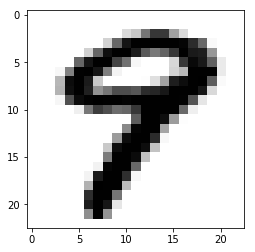

In [6]:
def ShowMe(X):
    Y= 1.0 - X
    plt.imshow(Y, cmap='gray')
    plt.show()

X = np.array(df)
ShowMe(X)

PCA 차원 축소 함수 정의:

In [7]:
def reducedPCA(X,nPC):
    pca = PCA(n_components = nPC)
    X_pca = pca.fit_transform(X)
    return pca.inverse_transform(X_pca)

PCA 차원 축소 적용:

N# of PCs = 23


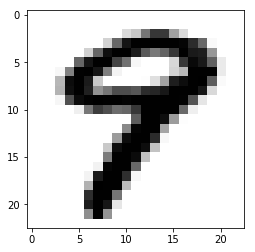

N# of PCs = 10


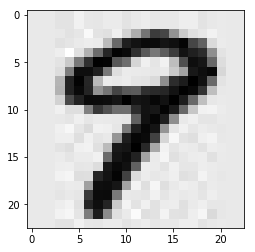

N# of PCs = 5


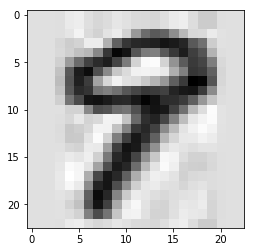

N# of PCs = 3


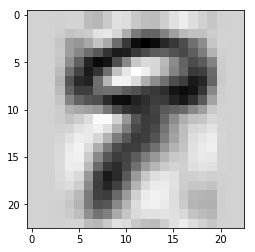

N# of PCs = 1


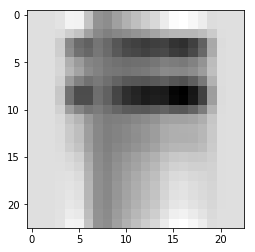

In [14]:
for nPC in [23, 10, 5, 3, 1]:
    Z = reducedPCA(X,nPC)
    print( "N# of PCs = " + str(nPC))
    ShowMe(Z)
# 23차원으로 만들어진 이 샘플 데이터는 9를 그리고 있고,
# 5차원 또는 3차원 까지 축소해도 9를 판별할 수 있음을 알 수 있다.
# 이를 통해 18차원을 차원 축소해도 ... ㄱㅊ

NMF 차원 축소 함수 정의:

In [10]:
def reducedNMF(X,n):
    nmf = NMF(n_components=n, init='random', random_state=0)
    X_nmf = nmf.fit_transform(X)
    return nmf.inverse_transform(X_nmf)

NMF 차원 축소 적용:

N# of Components = 23


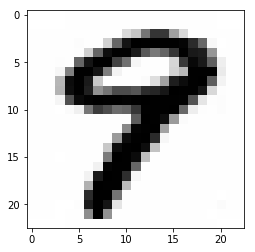

N# of Components = 10


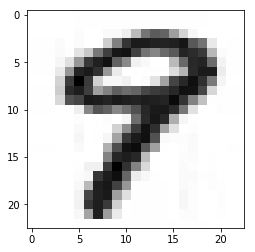

N# of Components = 5


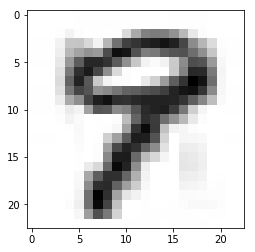

N# of Components = 3


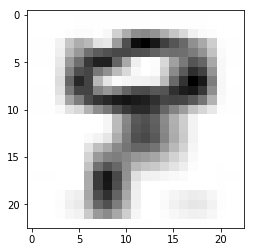

N# of Components = 1


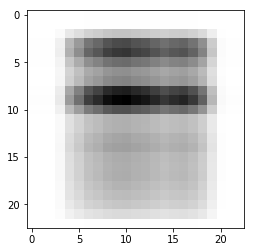

In [13]:
for n in [23, 10, 5, 3, 1]:
    Z = reducedNMF(X,n)
    print( "N# of Components = " + str(n))
    ShowMe(Z)